In [37]:
import torch
import torch.nn as nn
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
class linear_model(torch.nn.Module):
    def __init__(self):
        super(linear_model, self).__init__()
        self.layer1 = nn.Linear(2,1, bias = 0)
    def forward(self,x):
        y_predicted=self.layer1(x) 
        return y_predicted

In [29]:
model = linear_model()

In [30]:
for p in model.parameters():
    print(p)
nn.init.constant_(p, 0)

Parameter containing:
tensor([[ 0.4138, -0.0856]], requires_grad=True)


Parameter containing:
tensor([[0., 0.]], requires_grad=True)

In [39]:
X = np.array([[0.05, 0.03], [0.05, -0.03], [-0.1, 1], [0.1,1]])
index = [0, 1, 2, 3]
prob = [0.05, 0.05,0.45, 0.45 ]
y = np.array([[1], [1], [1], [1]])

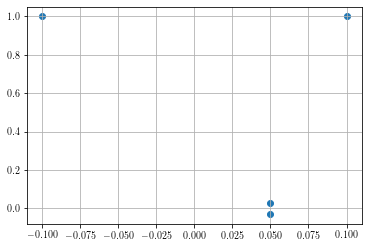

In [40]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

In [41]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [42]:
criterion = nn.MSELoss()

## Stochastic Gradient Descent

In [43]:
iterate_cycle = []

for i in range(100):
    for p in model.parameters():
        nn.init.constant_(p, 0)

    iterates = []
    indices = []

    for epoch in range(400):
        optimizer.zero_grad()
        ix = np.random.choice(index, p = prob)
        preds = model(torch.tensor(X[ix].reshape(-1, 2)).float())
        loss = criterion( preds, torch.tensor(y[ix].reshape(-1, 1)).float())
        loss.backward()
        optimizer.step()
        indices.append(ix)
        for p in model.parameters():
            v = p.detach().numpy()
            iterates.append(deepcopy(v))
    iterate_cycle.append(iterates)

In [44]:
plt.rcParams['text.usetex'] = True

In [59]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([[4.        ],
       [0.99910081]])

## Weighted Least Squares Solution

$\beta = (X^TWX)^{-1}X^TWy$

$W:= diag(Weights)$

In [70]:
W = np.diag(weights.detach().numpy().reshape(-1))

In [71]:
W

array([[0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.45, 0.  ],
       [0.  , 0.  , 0.  , 0.45]], dtype=float32)

In [73]:
w_opt = np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T.dot(W).dot(y))

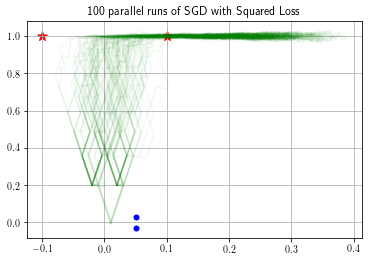

In [105]:
for i in range(100):
    new_list = []
    for elem in iterate_cycle[i]:
        new_list.append(list(elem[0]))
    new_iterates = np.array(new_list)
    plt.plot(new_iterates[:, 0], new_iterates[:, 1], c='g', alpha=0.05)
plt.grid()
plt.scatter(X[:, 0][:2], X[:, 1][:2], c='b', marker='.', s = 100, label = "Rare Data - $10\%$")
plt.scatter(X[:, 0][2:], X[:, 1][2:], c='r', marker='*', s = 100, label = "Likely Data - $90\%$")
plt.title("100 parallel runs of SGD with Squared Loss")
plt.savefig("toy_sgd_squared.pdf")
# plt.xticks(np.arange(-0.11, 0.26, 0.05))
# plt.plot(new_iterates_1[:, 0], new_iterates_1[:, 1])

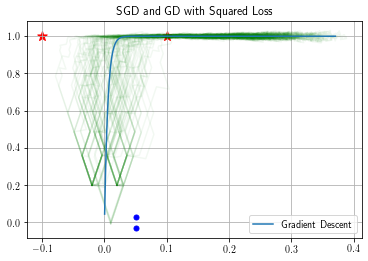

In [107]:
for i in range(100):
    new_list = []
    for elem in iterate_cycle[i]:
        new_list.append(list(elem[0]))
    new_iterates = np.array(new_list)
    plt.plot(new_iterates[:, 0], new_iterates[:, 1], c='g', alpha=0.05)
plt.grid()
plt.scatter(X[:, 0][:2], X[:, 1][:2], c='b', marker='.', s = 100, )
plt.scatter(X[:, 0][2:], X[:, 1][2:], c='r', marker='*', s = 100, )
plt.title("SGD and GD with Squared Loss")
plt.plot(new_iterates_1[:, 0][:2500], new_iterates_1[:, 1][:2500], label="Gradient Descent")
plt.legend()
plt.savefig("toy_sgd_gd_squared.pdf")


In [108]:
w_opt

array([[0.54054056],
       [0.99990001]])

In [120]:
plt.arrow?

In [154]:
w_opt[1]/w_opt[0]*0.1

array([0.18498149])

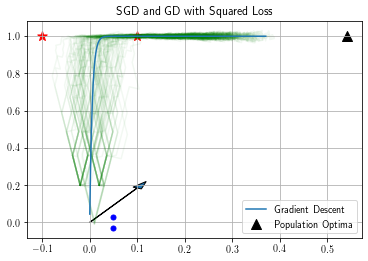

In [161]:
for i in range(100):
    new_list = []
    for elem in iterate_cycle[i]:
        new_list.append(list(elem[0]))
    new_iterates = np.array(new_list)
    plt.plot(new_iterates[:, 0], new_iterates[:, 1], c='g', alpha=0.05)
plt.grid()
plt.title("SGD and GD with Squared Loss")
plt.plot(new_iterates_1[:, 0][:2500], new_iterates_1[:, 1][:2500], label="Gradient Descent")
plt.scatter([w_opt[0]], [w_opt[1]], c = 'black', marker = '^', s=100, label = "Population Optima")
plt.scatter(X[:, 0][:2], X[:, 1][:2], c='b', marker='.', s = 100, )
plt.scatter(X[:, 0][2:], X[:, 1][2:], c='r', marker='*', s = 100, )

plt.legend()
plt.savefig("toy_sgd_gd_squared_optimal.pdf")
plt.arrow(0, 0, 0.1, 0.185, head_length = 0.04, head_width=0.02)
plt.savefig("toy_sgd_gd_squared_optimal_arrow.pdf")
# 

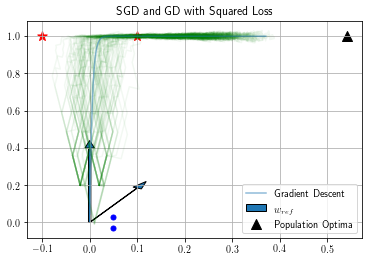

In [174]:
for i in range(100):
    new_list = []
    for elem in iterate_cycle[i]:
        new_list.append(list(elem[0]))
    new_iterates = np.array(new_list)
    plt.plot(new_iterates[:, 0], new_iterates[:, 1], c='g', alpha=0.05)
plt.grid()
plt.title("SGD and GD with Squared Loss")
plt.plot(new_iterates_1[:, 0][:2500], new_iterates_1[:, 1][:2500], label="Gradient Descent", alpha=0.5)
plt.scatter([w_opt[0]], [w_opt[1]], c = 'black', marker = '^', s=100, label = "Population Optima")
plt.scatter(X[:, 0][:2], X[:, 1][:2], c='b', marker='.', s = 100, )
plt.scatter(X[:, 0][2:], X[:, 1][2:], c='r', marker='*', s = 100, )

# plt.savefig("toy_sgd_gd_squared_optimal.pdf")
plt.arrow(0, 0, 0.1, 0.185, head_length = 0.04, head_width=0.02)
# plt.savefig("toy_sgd_gd_squared_optimal_arrow.pdf")
plt.arrow(0, 0, 0, 0.4, head_length = 0.04, head_width=0.02, label = '$w_{ref}$', width=0.005)
plt.legend()
plt.savefig("toy_sgd_gd_squared_optimal_arrow_wref_1.pdf")


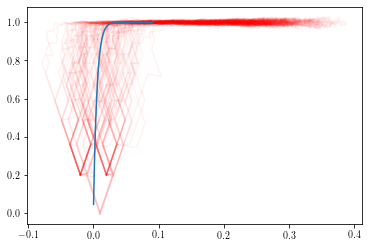

In [75]:
for i in range(100):
    new_list = []
    for elem in iterate_cycle[i]:
        new_list.append(list(elem[0]))
    new_iterates = np.array(new_list)
    plt.plot(new_iterates[:, 0], new_iterates[:, 1], c='r', alpha=0.05)
plt.plot(new_iterates_1[:, 0], new_iterates_1[:, 1])

## Population Gradient Descent

In [86]:
X

array([[ 0.05,  0.03],
       [ 0.05, -0.03],
       [-0.1 ,  1.  ],
       [ 0.1 ,  1.  ]])

In [87]:
gd_criterion = nn.MSELoss(reduction='none')

In [88]:
gd_model = linear_model()

for p in gd_model.parameters():
    print(p)
nn.init.constant_(p, 0)

Parameter containing:
tensor([[0.3191, 0.3843]], requires_grad=True)


Parameter containing:
tensor([[0., 0.]], requires_grad=True)

In [89]:
gd_optimizer = torch.optim.SGD(gd_model.parameters(), lr=0.1)

In [90]:
weights = torch.tensor([[0.05, 0.05, 0.45, 0.45]]).reshape(-1, 1)

In [91]:
iterates = []
indices = []

for epoch in range(10000):
    gd_optimizer.zero_grad()
    preds = gd_model(torch.tensor(X).float())
    loss = gd_criterion( preds, torch.tensor(y.reshape(-1, 1)).float())
    loss_new = loss * weights
    loss_f = torch.mean(loss_new)
    loss_f.backward()
    gd_optimizer.step()
    indices.append(ix)
    for p in gd_model.parameters():
        v = p.detach().numpy()
        iterates.append(deepcopy(v))

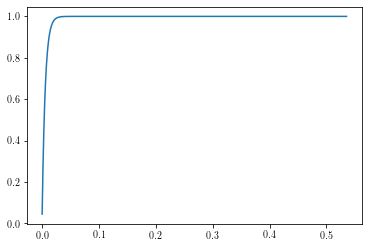

In [92]:
new_list_1 = []
for elem in iterates:
    new_list_1.append(list(elem[0]))
new_iterates_1 = np.array(new_list_1)
plt.plot(new_iterates_1[:, 0], new_iterates_1[:, 1])

In [93]:
w_opt

array([[0.54054056],
       [0.99990001]])